# ROC & AUC plotted in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plotROC(predStrengths, classLabels):
    cur = (1.0, 1.0)
    ySum = 0.0
    numPosClass = sum(classLabels == 1.0)
    yStep = 1/float(numPosClass)
    xStep = 1/float(len(classLabels) - numPosClass)
    sortedIndices = predStrengths.argsort()
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    
    for index in range(sortedIndices.tolist()[0]):
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]
        ax.plot([cur[0], cur[0] - delX], [cur[1], cur[1] - delY], c = 'b')
        cur = (cur[0] - delX, cur[1] - delY)
    
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    ax.axis([0, 1, 0, 1])
    plt.show()
    
    print("The AUC is: ", ySum * xStep)

In [3]:
y = np.array([1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])
scores = np.array([0.9, 0.8, 0.7, 0.6, 0.55, 0.54, 0.53, 0.52, 0.51, 0.505, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.3, 0.1])

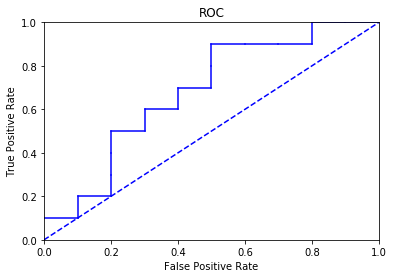

The AUC is:  0.6800000000000002


In [4]:
plotROC(scores, y + 1)